In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [3]:
sns.set(style="whitegrid")

df = pd.read_csv("Mall_Customers.csv")
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


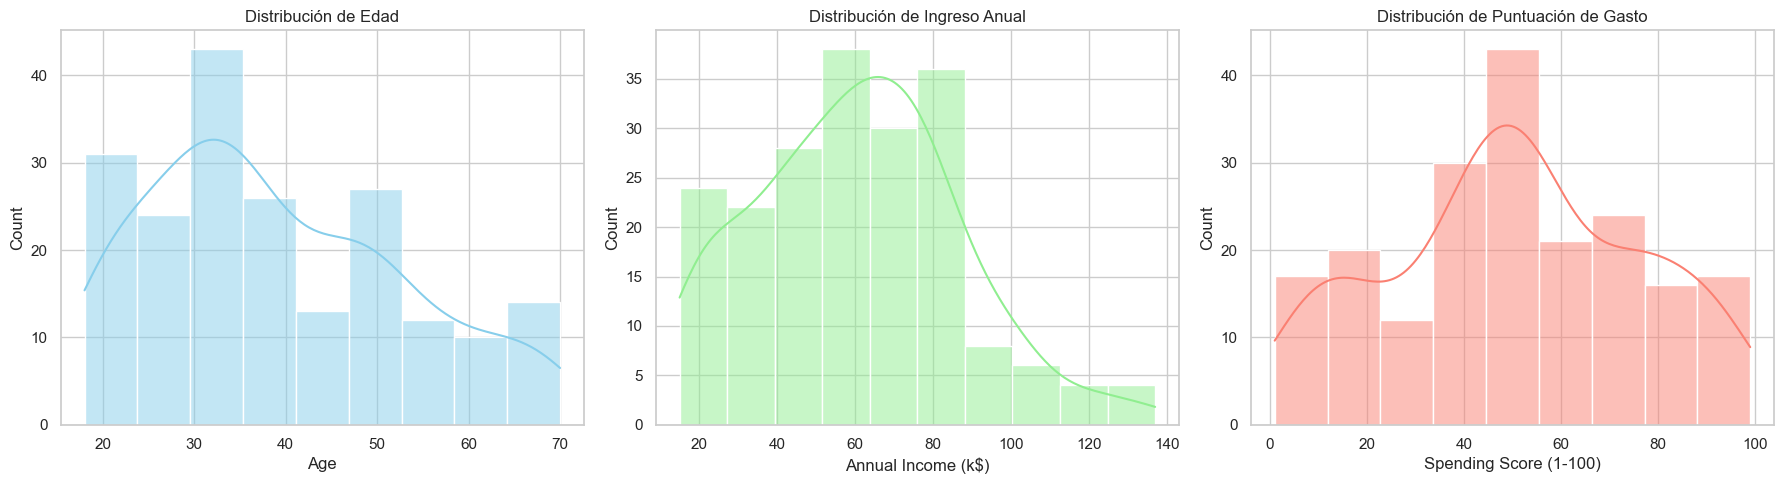

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["Age"], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title("Distribución de Edad")
sns.histplot(df["Annual Income (k$)"], kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title("Distribución de Ingreso Anual")
sns.histplot(df["Spending Score (1-100)"], kde=True, ax=axs[2], color='salmon')
axs[2].set_title("Distribución de Puntuación de Gasto")
plt.tight_layout()
plt.show()

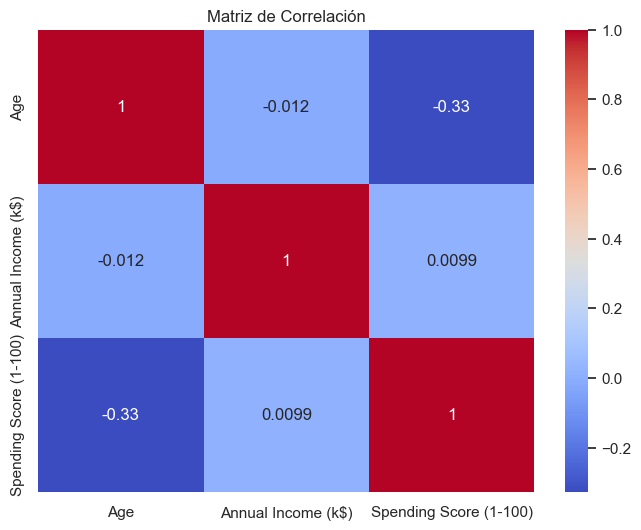

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns='CustomerID').corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [7]:
df_clean = df.drop(columns=["CustomerID"])
df_clean["Gender"] = LabelEncoder().fit_transform(df_clean["Gender"])

print("Valores faltantes:\n", df_clean.isnull().sum())

Valores faltantes:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

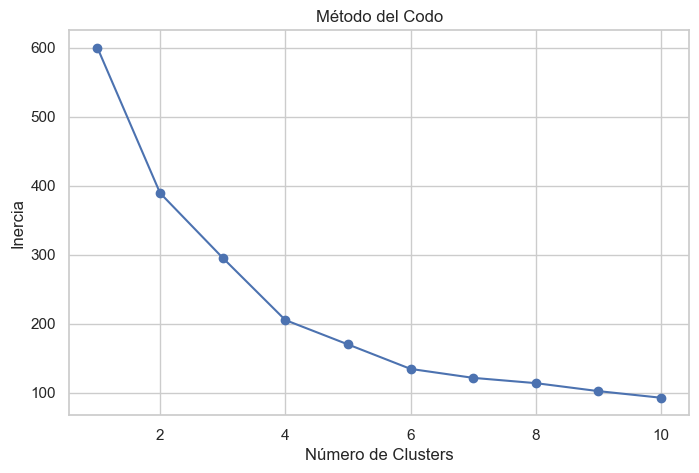

In [9]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df_clean["Cluster"] = labels

In [22]:
sil_score = silhouette_score(X_scaled, labels)
calinski_score = calinski_harabasz_score(X_scaled, labels)
print(f"Coeficiente de Silhouette: {sil_score:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski_score:.2f}")

Coeficiente de Silhouette: 0.408
Índice de Calinski-Harabasz: 123.42


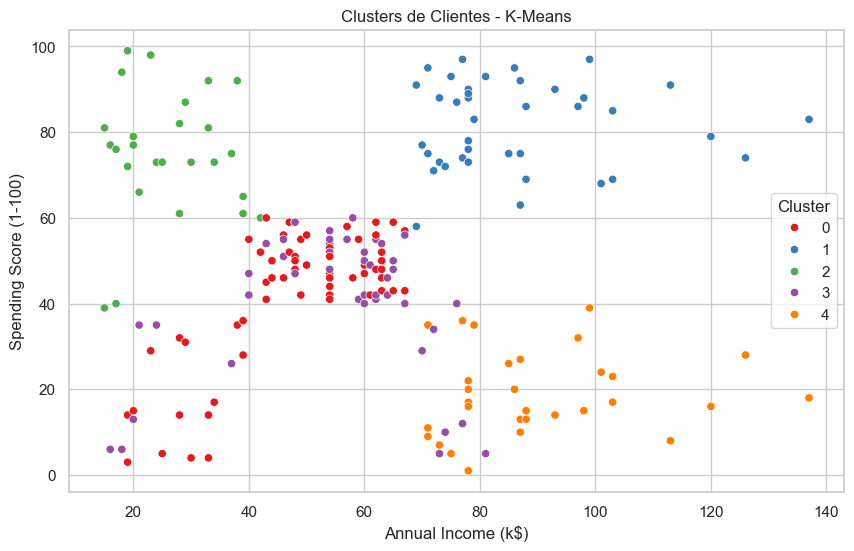

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="Set1")
plt.title("Clusters de Clientes - K-Means")
plt.show()

In [26]:
for i in range(5):
    print(f"\nCluster {i}:")
    display(df_clean[df_clean["Cluster"] == i].describe())


Cluster 0:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,58.000000,58.000000,58.000000,58.000000,58.0
mean,0.431034,55.275862,47.620690,41.706897,0.0
std,0.499546,8.571256,13.413567,15.697814,0.0
min,0.000000,40.000000,19.000000,3.000000,0.0
25%,0.000000,49.000000,39.250000,37.250000,0.0
50%,0.000000,53.000000,48.500000,46.000000,0.0
75%,1.000000,63.750000,59.750000,52.000000,0.0
max,1.000000,70.000000,67.000000,60.000000,0.0



Cluster 1:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,40.000000,40.000000,40.000000,40.000000,40.0
mean,0.450000,32.875000,86.100000,81.525000,1.0
std,0.503831,3.857643,16.339036,9.999968,0.0
min,0.000000,27.000000,69.000000,58.000000,1.0
25%,0.000000,30.000000,74.750000,74.000000,1.0
50%,0.000000,32.000000,78.500000,83.000000,1.0
75%,1.000000,36.000000,94.000000,90.000000,1.0
max,1.000000,40.000000,137.000000,97.000000,1.0



Cluster 2:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,26.000000,26.000000,26.000000,26.000000,26.0
mean,0.423077,25.769231,26.115385,74.846154,2.0
std,0.503831,5.435496,8.557228,15.069684,0.0
min,0.000000,18.000000,15.000000,39.000000,2.0
25%,0.000000,21.250000,19.000000,67.500000,2.0
50%,0.000000,24.000000,24.500000,75.500000,2.0
75%,1.000000,30.750000,33.000000,81.750000,2.0
max,1.000000,35.000000,42.000000,99.000000,2.0



Cluster 3:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,45.000000,45.000000,45.000000,45.000000,45.0
mean,0.400000,26.733333,54.311111,40.911111,3.0
std,0.495434,7.085196,16.162277,16.285552,0.0
min,0.000000,18.000000,16.000000,5.000000,3.0
25%,0.000000,20.000000,46.000000,35.000000,3.0
50%,0.000000,26.000000,59.000000,46.000000,3.0
75%,1.000000,32.000000,64.000000,54.000000,3.0
max,1.000000,40.000000,81.000000,60.000000,3.0



Cluster 4:


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,31.000000,31.000000,31.000000,31.000000,31.0
mean,0.516129,44.387097,89.774194,18.483871,4.0
std,0.508001,8.232770,16.754521,10.194348,0.0
min,0.000000,32.000000,71.000000,1.000000,4.0
25%,0.000000,37.000000,78.000000,12.000000,4.0
50%,1.000000,44.000000,87.000000,17.000000,4.0
75%,1.000000,49.000000,98.500000,25.000000,4.0
max,1.000000,59.000000,137.000000,39.000000,4.0
